In [1]:
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr

import sys
sys.path.insert(1, '../Merging_Data')

from sklearn.preprocessing import MinMaxScaler

import WranglerFunctions as wf
import FullDataset as fd

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


C:\Users\vojno\OneDrive - University of Bristol\Applied Data Science\Mining\Notebooks\Modelling_notebooks\../Merging_Data\WranglerFunctions.py:138: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(location   , index_col=False, names=["Dates", "PX_LAST"])
C:\Users\vojno\OneDrive - University of Bristol\Applied Data Science\Mining\Notebooks\Modelling_notebooks\../Merging_Data\WranglerFunctions.py:138: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(location   , index_col=False, names=["Dates", "PX_LAST"])
C:\Users\vojno\OneDrive - University of Bristol\Applied Data Science\Mining\Notebooks\Modelling_notebooks\../Merging_Data\FullDataset.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

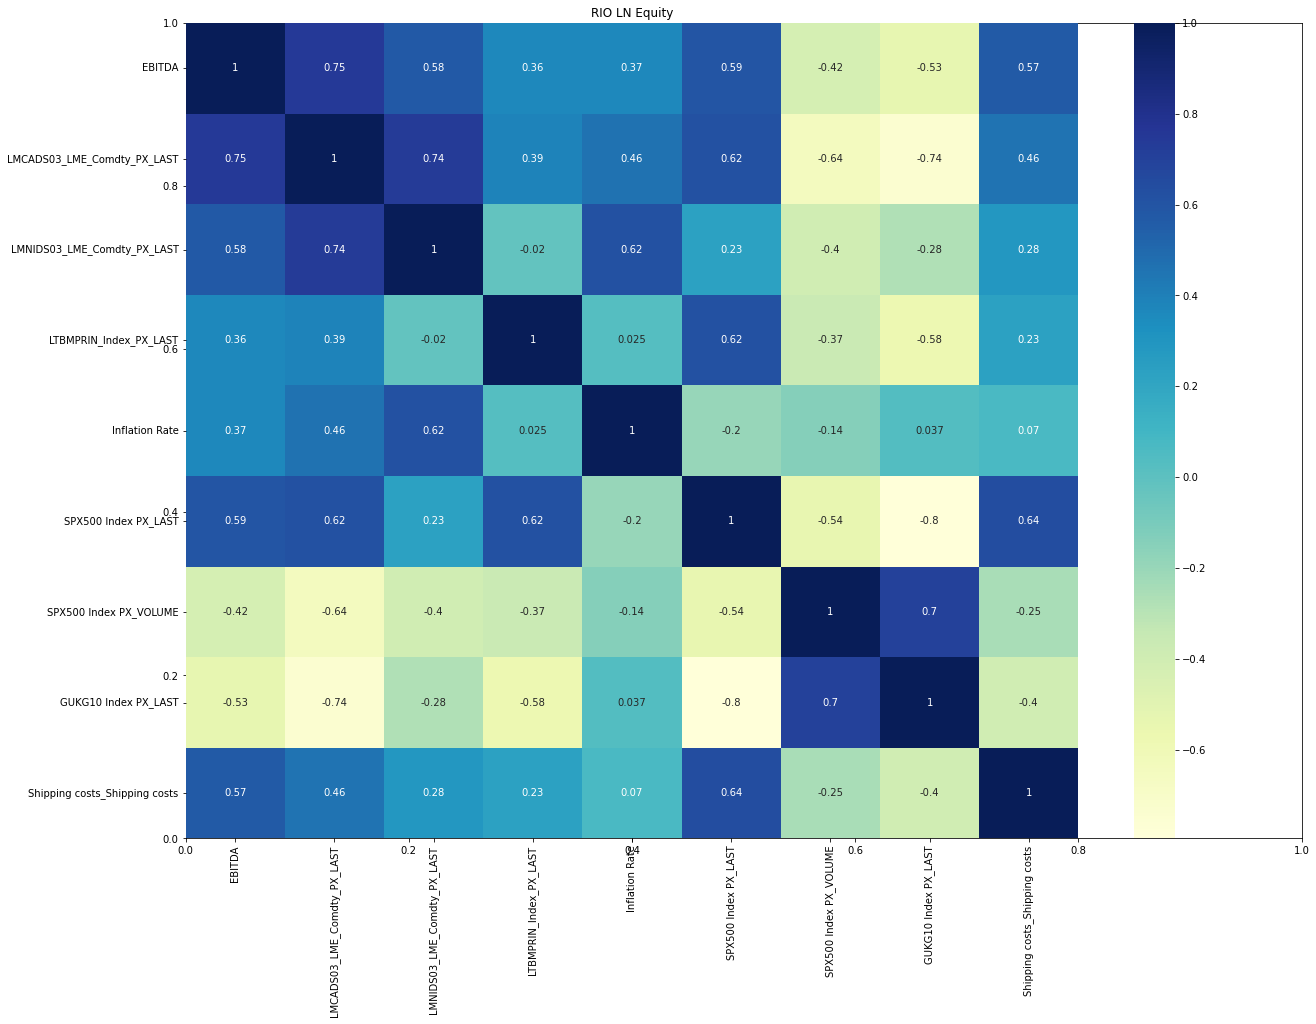

In [2]:
RIO_full = fd.GetFullDatasetForCompany("RIO LN Equity")
RIO_full.index = RIO_full['Date']
RIO_full = RIO_full.drop('Date', axis = 1)

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

corr = RIO_full.corr()
discardedColumns = []
for column_idx in range(1, len(RIO_full.columns)):
    for row_idx in range (1, len(RIO_full.columns)):
        if (row_idx != column_idx):
            if (corr[corr.columns[column_idx]].loc[corr.columns[row_idx]] > 0.8):
                if (abs(corr['EBITDA'].loc[corr.columns[column_idx]]) > abs(corr['EBITDA'].loc[corr.columns[row_idx]])):
                    if (not corr.columns[row_idx] in discardedColumns):
                        discardedColumns.append(corr.columns[row_idx])
                else:
                    if (not corr.columns[column_idx] in discardedColumns):
                        discardedColumns.append(corr.columns[column_idx])
        else:
            break

RIO_removedInterCorrelation = RIO_full.drop(discardedColumns, axis = 1)
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("RIO LN Equity")

pvalues = calculate_pvalues(RIO_removedInterCorrelation)
statisticallySignificant = pvalues <= 0.05
discardedColumns = statisticallySignificant[statisticallySignificant['EBITDA'].values == False].index
RIO_final = RIO_removedInterCorrelation.drop(discardedColumns, axis = 1)
heatmap = sb.heatmap(RIO_final.corr(), cmap="YlGnBu", annot=True)

In [3]:
def show_graph(df1, df2, title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else: 
            if col == "EBITDA":
                data[col].plot(label=col)
            elif col == "Actual":
                data[col].plot(label=col)
    plt.title(title)
    plt.legend()
    plt.show()

1
1


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


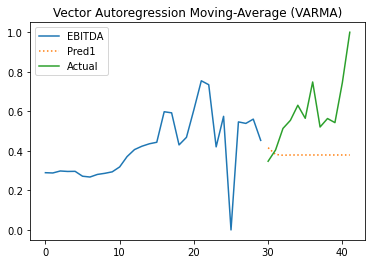

1
2


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


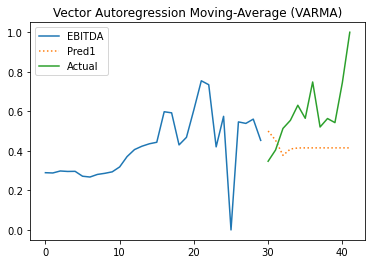

1
3


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:396: UserWarning: Non-stationary starting moving-average parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting moving-average parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


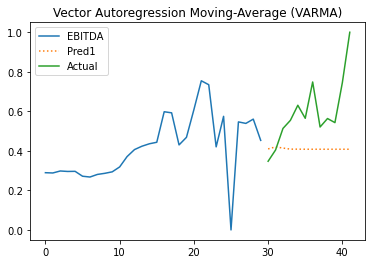

1
4


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:396: UserWarning: Non-stationary starting moving-average parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting moving-average parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


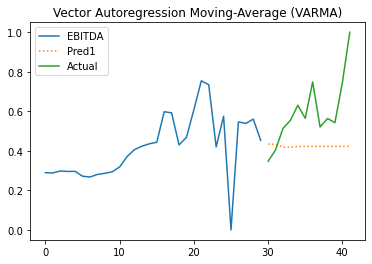

1
5


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:396: UserWarning: Non-stationary starting moving-average parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting moving-average parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


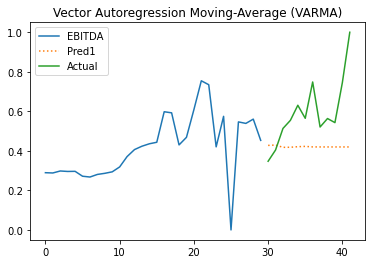

1
6


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:396: UserWarning: Non-stationary starting moving-average parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting moving-average parameters'


KeyboardInterrupt: 

In [4]:
def VARMA_model(train,test, p, q):
    # fit model
    model = VARMAX(train, order=(p, q))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.forecast(steps=len(test))
    res=pd.DataFrame({"Pred1":yhat['EBITDA'], "Actual":test['EBITDA'].values})
    return res

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(RIO_final.values)

scaled_df = pd.DataFrame(scaled, columns = RIO_final.columns)

df_train = scaled_df.head(30)
df_test = scaled_df.tail(12)

for p in range(1, 2):
    for q in range(1, 21):
        print(p)
        print(q)
        df_ret = VARMA_model(df_train, df_test, p, q)
        show_graph(df_train, df_ret, "Vector Autoregression Moving-Average (VARMA)")